/apps/jupyter/6.5.4/lib/python3.10/site-packages/PIL/Image.py:3074: DecompressionBombWarning: Image size (105512960 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


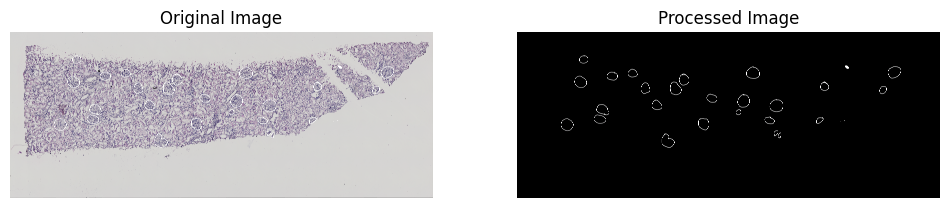

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # Open the image
    with Image.open(image_path) as img:
        # Convert the image to a numpy array for easier manipulation
        img_array = np.array(img)

        # Assuming the image is grayscale. Adjust if your image is RGB.
        mask = img_array != 255
        processed_img_array = np.copy(img_array)
        processed_img_array[mask] = 0

        # Convert the numpy arrays back to images
        processed_img = Image.fromarray(processed_img_array)

        # Visualization
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        
        ax[0].imshow(img, cmap='gray')
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        ax[1].imshow(processed_img, cmap='gray')
        ax[1].set_title('Processed Image')
        ax[1].axis('off')

        plt.show()

        # Optionally, save the processed image
        processed_img.save('processed_image.tif')

# Replace 'path_to_your_image.tif' with the actual path to your .tif file
process_image('/blue/pinaki.sarder/j.maragall/overlay_channel_6_procreate.tiff') #15-1_glom_tub_Stitch.tiff


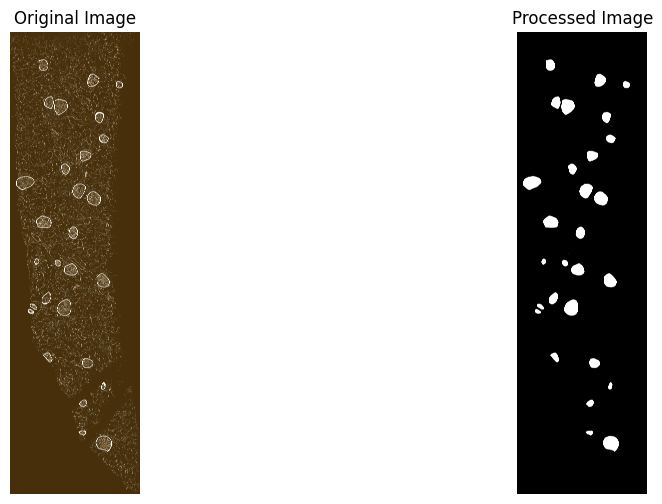

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def process_image(image_path):
    # Open the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to make sure it's binary (white is our interest)
    _, binary_img = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY)

    # Find contours and hierarchy to identify enclosed regions
    contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # Fill enclosed areas
    for i in range(len(contours)):
        if hierarchy[0][i][3] != -1:  # Means this contour is inside another one.
            cv2.drawContours(img, contours, i, (255, 255, 255), thickness=cv2.FILLED)

    # Applying the initial condition: everything not white becomes black
    img[img != 255] = 0

    processed_img = Image.fromarray(img)

    # Visualization
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(Image.open(image_path), cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(processed_img, cmap='gray')
    ax[1].set_title('Processed Image')
    ax[1].axis('off')

    plt.show()

    # Optionally, save the processed image
    processed_img.save('glom_processed_image.tif')

# Replace 'path_to_your_image.tif' with the actual path to your .tif file
process_image('/blue/pinaki.sarder/j.maragall/overlay_channel_6_procreate.tiff')
